# 서초구 관광데이터 분석을 통한 관광 활성화

## (1) 주제 선정 이유

한국관광 데이터랩(https://datalab.visitkorea.or.kr) 에서 제공하는 지역별 외지인 방문자수 데이터를 참고하면, 서울시 서초구를 방문하는 외지인의 비율은 대한민국 전체 지역의 방문자 수의 8%로, 서울시 강남구에 이어 전국 2위였다.

In [1]:
import pandas as pd

visitors = pd.read_csv('/Users/jeongwon/Documents/대학/2-1/웹파/STUDENT_LECTUREMATERIAL/5_PROJECT_RegularCourse_ONLY/20230517173544_광역별 방문자 수.csv', encoding = 'cp949')
visitors_sorted = visitors.sort_values(by=visitors.columns[4], ascending = False)
visitors_sorted

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
161,서울특별시,강남구,1.999825e+09,25.2,221489190.0,11.1
160,서울특별시,서초구,1.999825e+09,25.2,160259311.0,8.0
164,서울특별시,중구,1.999825e+09,25.2,142686936.0,7.1
140,서울특별시,종로구,1.999825e+09,25.2,138105527.0,6.9
162,서울특별시,송파구,1.999825e+09,25.2,122199731.0,6.1
...,...,...,...,...,...,...
73,경상남도,의령군,3.861439e+08,4.9,4315370.0,1.1
213,전라북도,장수군,2.343417e+08,3.0,2975842.0,1.3
15,강원도,양구군,2.765797e+08,3.5,2913793.0,1.1
103,경상북도,울릉군,3.451236e+08,4.4,2008827.0,0.6


<br>
그러나 티맵 내비게이션 데이터 분석 결과, 외지인이 가장 많이 방문하는 10개 서초구의 관광지는 백화점, 대형마트, 호텔에 치중돼 있어 관광지 그 자체로 갖는 의미는 크지 않았다.

In [2]:
places = pd.read_csv('/Users/jeongwon/Documents/대학/2-1/웹파/STUDENT_LECTUREMATERIAL/5_PROJECT_RegularCourse_ONLY/20230517131500_인기관광지_외지인.csv', encoding = 'cp949')
places.head(10)

,순위,관광지명,주소,분류,외지인 검색 수
0,1,신세계백화점강남점,서울 서초구 신반포로 176-0,백화점,626261
1,2,코스트코홀세일양재점,서울 서초구 양재대로 159-0,대형마트,378689
2,3,예술의전당,서울 서초구 남부순환로 2406-0,공연시설,271600
3,4,서울고속버스터미널경부영동선,서울 서초구 신반포로 194-0,교통시설,243672
4,5,하나로마트양재점,서울 서초구 청계산로 10-0,대형마트,204054
5,6,반포한강공원,서울 서초구 신반포로11길 40-0,도시공원,167614
6,7,더케이호텔서울,서울 서초구 바우뫼로12길 70-0,호텔,118739
7,8,더리버사이드호텔,서울 서초구 강남대로107길 6-0,호텔,110242
8,9,신세계센트럴시티터미널호남선,서울 서초구 신반포로 176-0,교통시설,107379
9,10,JW메리어트호텔서울,서울 서초구 신반포로 176-0,호텔,101860


<br>
서초구민으로서 이에 아쉬움을 느꼈고, 백화점, 마트, 호텔 뿐만 아닌 서초구의 다른 특색있는 관광시설을 파악하고, 이를 활성화 및 개선할 방안을 제시하는 것을 목표로 하였다.

## (2) 프로젝트를 통해 얻고자 하는 것

외지인 방문자의 수가 적은 서초구의 관광지와 해당 관광지의 특색을 찾는 과정을 통해 서초구의 관광 활성화 방안을 모색하고자 한다.

이를 위해 다음의 과정을 거쳤다.

1. 서초구 외지인 방문자 통계 분석
2. 서초구의 관광지 찾기
3. 해당 관광지에 대한 평가를 바탕으로 활성화 방안, 개선점 제시

## (3) 인터넷을 통한 데이터 획득

### a. 서초구 외지인 방문자 통계 분석하기

* 한국관광 데이터랩 제공: 지역별 방문자수(외지인)  
* 한국관광 데이터랩 제공: 지역별 검색건수(외지인)  

### b. 서초구 관광지 찾기

소셜데이터 분석을 통해 사람들이 추천하고 많이 방문하는 서초구의 관광지를 찿는다.

서초구 관광지와 관련된 검색어를 정하고, 이의 검색결과에 대해 네이버 Open API를 통해, Python을 이용하여 네이버 블로그 크롤링을 진행했다. 일정 갯수가 넘어가면 서초구와 관련 없는 블로그가 많아 여러 개의 검색어로 각각 최대 50번의 크롤링을 진행했다. 검색어로는 '서초구 가볼만한곳', '서초구 놀거리', '서초구 명소', '서초구 여행' 를 선정하였다.

우선 검색어가 포함된 게시글의 제목과 링크를 크롤링했다. 네이버 Open API는 블로그 크롤링 횟수를 100개씩 10번, 총 1000번으로 제한하고 있었고, 시간 상 100개의 검색결과만 크롤링 하였다.

우선 검색어를 입력한 횟수만큼 검색하여 블로그의 제목과 링크를 가져와 리스트로 리턴하는 함수를 작성했다.

In [3]:
import os
import sys
import urllib.request
import re
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

In [4]:
# 검색결과로 제목, 링크 리턴 함수
def get_titles_links(keyword ,number, start):
    # 입력 패러미터 keyword(str), number(str), start(str)
    
    # 정보 입력
    client_id = 'client_id'
    client_secret = 'client_secret'
    encText = urllib.parse.quote(keyword)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=" + number + "&start=" + start # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode==200):
        response_body = response.read()
        # print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

    body = response_body.decode('utf-8')

    body = body.replace('"', '')

    # re 모듈로 나누기
    blogs = re.split('[,\n\t]+', body)

    # 제목, 링크 추출
    titles = []
    links = []
    for info in blogs:
        if info.startswith('title'):
            titles.append(info)
        elif info.startswith('link:'):
            links.append(info)

    # 다듬기
    links_replaced = []
    for link in links:
        first = link.replace('\\', '')
        second = first.replace('?Redirect=Log&logNo=', '/')
        third = second.replace("link:", "", 1)
        links_replaced.append(third)
    links = links_replaced

    titles_replaced = []
    for title in titles:
        title = title.replace("title:", "", 2)
        titles_replaced.append(title)
    titles = titles_replaced
    
    # 테스트
    print(f"제목: {titles}, 총 {len(titles)}개\n")
    print(f"링크: {links}, 총 {len(links)}개")
    
    return titles, links

<br>
위의 함수에서 리턴값으로 받은 링크 리스트를 하나씩 검색하여 링크의 본문 내용을 가져와 리스트로 리턴하는 함수, 그리고 획득한 제목, 링크, 본문을 dataframe으로 만들어 리턴하는 함수를 작성했다.

In [5]:
# 블로그 링크 하나씩 본문 크롤링 함수
def get_contents(links):
    # 웹드라이버 설정(파이어폭스)
    driver = webdriver.Firefox(executable_path="/Users/jeongwon/Python/geckodriver")
    
    contents = []
    # 링크 하나씩 열기
    for link in links:
        try:
            driver.get(link)
        except ConnectionRefusedError:
            time.sleep(5)
            driver.get(link)
        time.sleep(3)
        # 링크 목록에 네이버 블로그 대신 티스토리 블로그가 껴있어 발생한 오류 방지
        try:
            driver.switch_to.frame("mainFrame")
            try:
                content = driver.find_element(By.CSS_SELECTOR, 'div.se-main-container').text
                contents.append(content)
            except NoSuchElementException:
                content = driver.find_element(By.CSS_SELECTOR, 'div#content-area').text
                contents.append(content)
        except:
            contents.append(content)
        
    driver.quit()
    
    return contents

# 제목, 링크, 본문으로 dataframe 생성 함수
def blog_df(titles, links, contents):
    df = pd.DataFrame({'제목':titles, '링크':links, '본문':contents})

    df.to_csv('blogs.csv', encoding='utf-8-sig', index = False)
    
    return df

<br>
이후 함수를 호출하여 dataframe을 생성했다.

In [6]:
titles_1, links_1 = get_titles_links('서초구 가볼만한곳', '15', '1')
contents_1 = get_contents(links_1)

titles_2, links_2 = get_titles_links('서초구 가볼만한곳', '15', '16')
contents_2 = get_contents(links_2)

제목: ['17개월 아기 <b>가볼만한곳<\\/b> :: <b>서초구<\\/b> 서리풀 노리학교_주차', '<b>서초구 가볼만한곳<\\/b> 양재동 매헌시민의숲 주차 정보 양재천 산책... ', '<b>서초구가볼만한곳<\\/b> 청계산원터골등산로', '국립국악원 국악박물관', '프리미엄 일식 코스 로바 잠원점 <b>서초구 가볼만한곳<\\/b>', '<b>서초구<\\/b> 카페 주말 브런치', '<b>서초구<\\/b> 국립국악원 국악박물관 아이와 <b>가볼만한 곳<\\/b>', '<b>서초구 가볼만한 곳<\\/b> 국립중앙도서관 (디지털도서관)이용방법과... ', '서울 <b>서초구 가볼만한곳<\\/b> 잠원 한강공원 노을과 야경', '[<b>서초구 가볼만한곳<\\/b>] 복합문화공간 예술의전당... ', '서울 <b>서초구<\\/b> 엘림동산 종일권... 아이랑 실외 놀이시설 <b>가볼만한곳<\\/b>', '<b>서초구 가볼만한 곳<\\/b> 생맥주집 안주 맛있고 분위기 좋아요 아이펍', '<b>서초구 가볼만한곳<\\/b>', '<b>서초구 가볼만한곳<\\/b> 예술의전당 산책길 우면산 대성사 서울 둘레길', '서울 <b>서초구 가볼 만한 곳<\\/b> - 도시의 밤은 낮보다 화려하다'], 총 15개

링크: ['https://blog.naver.com/prosperouswillbe/223055264421', 'https://blog.naver.com/graenolae/223085097480', 'https://blog.naver.com/traveleat/222796094279', 'https://blog.naver.com/crystal_aria/222663979022', 'https://blog.naver.com/sarangmom11/222545404337', 'https://blog.naver.com/buzzerrbeate/223020052273', 'https://blog.naver.com/sirenj2813/222698296250', 'https://b

/var/folders/tn/nrf6yhvj6x9_h3qh9cb5n96r0000gn/T/ipykernel_18303/215392394.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path="/Users/jeongwon/Python/geckodriver")


제목: ['전기박물관', '<b>서초구가볼만한곳<\\/b> 헌인릉', 'ㅓ무 더워서 기절~<b>서초구 가볼만한 곳<\\/b>', '한성돈까스 | <b>서초구<\\/b>맛집... 서울데이트 서울<b>가볼만한곳<\\/b>', '<b>서초구 가볼 만한 곳<\\/b> ㅡ 양재천 산책과 양재매헌시민의 숲... ', '홍팥집 양재점  <b>서초구<\\/b>청 양재역 <b>가볼만한곳<\\/b> 내돈내산 팥빙수... ', '<b>서초구 가볼만한곳<\\/b> 디저트', '양재천 <b>가볼만한곳<\\/b> 매헌시민의숲 산책로 윤봉길의사기념관', '서울 <b>서초구<\\/b> 아이와 <b>가볼만한곳<\\/b> 국립국악박물관 아이들 체험... ', '김포 아이와 <b>가볼만한곳<\\/b>) 훌리훌리 시즌 4 체험형 미디어아트... ', '<b>서초구 가 볼 만한 곳<\\/b> - 대성사 목불좌상', '서울과 근교 야간 축제 <b>가볼만한곳<\\/b>', '서울 <b>서초구 가볼만한곳<\\/b> - 구경할만 한곳 - 걷기좋은곳 ?', '<b>서초구<\\/b> 아이와 <b>가볼만한곳<\\/b> 매헌윤봉길의사기념관 서울 역사 여행', '서울 여행 <b>서초구 가볼만한곳<\\/b> 예술의 전당 음악분수... '], 총 15개

링크: ['https://blog.naver.com/crystal_aria/222406967906', 'https://blog.naver.com/traveleat/222889761474', 'https://blog.naver.com/djfdmaaksu27/222834183376', 'https://blog.naver.com/tofha3039/223069298525', 'https://blog.naver.com/jhday777/223104240497', 'https://blog.naver.com/syclinic/222837826779', 'https://blog.naver.com/phy8146/222709996524', 'https://blog.naver.com/s6

In [7]:
titles_3, links_3 = get_titles_links('서초구 놀거리', '25', '1')
contents_3 = get_contents(links_3)

titles_4, links_4 = get_titles_links('서초구 명소', '20', '1')
contents_4 = get_contents(links_4)

titles_5, links_5 = get_titles_links('서초구 여행', '25', '1')
contents_5 = get_contents(links_5)

제목: ['서초 <b>놀거리<\\/b> <b>서초구<\\/b> 카페 미니말레 양재본점 방문', '<b>서초구<\\/b>에 <b>놀거리<\\/b>가 가득? 숨겨진 보물을 찾았다', '<b>서초구<\\/b> 사격장 \\/ 강남역에 <b>놀거리<\\/b>가 있었다! 스나이퍼 뱅', '인생샷 건지기 좋은 <b>서초구 놀거리<\\/b> 푸엘라카페', '강남역<b>놀거리<\\/b> <b>서초구<\\/b>사격장 스나이퍼뱅 투비존윅 테마', '3편]임장으로 <b>서초구<\\/b> 인프라 알아보기(<b>놀거리<\\/b> 먹거리 등 상권... ', '서울 <b>서초구<\\/b> 아이와... 아이들 체험 교육 <b>놀거리<\\/b> 가득 주차료 무료', '주말나들이', '| 서울 <b>서초구<\\/b> |  <b>놀거리<\\/b> 가득 6인 파티룸 객실 - 서초 유원호텔', '[서울 <b>서초구<\\/b> 양재]출장_코엑스 행사|양재 <b>놀거리<\\/b>', '서초 <b>놀거리<\\/b> 서초 부동산 강남 인근 분석하기', '강남역 <b>놀거리<\\/b> 베스트 9 | 실내 데이트 여행', '[<b>서초구<\\/b> 서초] 강남역<b>놀거리<\\/b> &quot;착한붕어낚시카페 강남점&quot; 아이가... ', '강남 <b>놀거리<\\/b> 라인프렌즈샵 캐릭터 소품샵', '양재천 비누원데이체험', '평일에도 웨이팅  <b>서초구<\\/b> 양재역에  위치한  쭈꾸미 .꼼장어... ', '한강 드라이브 코스 반포지구 서래섬 유채꽃 <b>놀거리<\\/b> 가득한... ', '서초 카페 <b>놀거리<\\/b> 미니말레 양재본점', '요즘 핫플 골목상권 합정역 7번출구 합정 데이트코스 <b>놀거리<\\/b> 추천', '[리뷰] 강남역 방탈출 카페 <b>놀거리<\\/b> 추천 미스터리룸 이스케이프... ', '[Event]<b>서초구<\\/b> 청소년 문화예술 활동 욕구조사 선착순... ', '카카오프렌즈샵 강남플래그십 스토어 강남 <b>놀거리<\\/b> 실내 데이트... ', '강남

/var/folders/tn/nrf6yhvj6x9_h3qh9cb5n96r0000gn/T/ipykernel_18303/215392394.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path="/Users/jeongwon/Python/geckodriver")


제목: ['따뜻한 봄날', '아직도 안가봤어? &quot;<b>서초구 명소<\\/b>', '서울 <b>서초구 명소<\\/b> 10개로 10분만에 영어단어 30개 기억하기', '[그렇게카페가된다\\/창업-INFO] 창업뉴스', '3년 만에 다시 &apos;봄&apos;! <b>서초구<\\/b> 벚꽃 <b>명소<\\/b> 3곳', '[<b>서초구<\\/b>] ❀서울벚꽃<b>명소<\\/b> 1탄 :: 양재시민의숲 양재천 벚꽃길❀', '내 기준 서울 벚꽃 <b>명소<\\/b>(석촌호수', '새해 일출 <b>명소<\\/b>로 서울 <b>서초구<\\/b> 우면산 소망탑의 우면산 해맞이... ', '<b>서초구<\\/b> 벚꽃<b>명소<\\/b>  피천득산책로 서울 걷기좋은길', '봄 나들이 <b>서초구<\\/b> 벚꽃<b>명소<\\/b> - 반포천 허밍웨이길 \\/ 주차팁... ', '나만 알고싶은 <b>서초구<\\/b> 벚꽃<b>명소<\\/b>', '<b>서초구<\\/b> 봄나들이 <b>명소<\\/b>추천', '[<b>서초구<\\/b>\\/양재] 서울 벚꽃 <b>명소<\\/b> 양재천 : 벚꽃길을 걸어요', '서울 벚꽃<b>명소<\\/b> 강남벚꽃<b>명소<\\/b> <b>서초구<\\/b>벚꽃<b>명소<\\/b>  양재천벚꽃... ', '<b>서초구명소<\\/b> 세계음악분수가 있는 예술의전당 에서 반값... ', '#전국 #훌라 <b>명소<\\/b>를 찾아서 ... 서울시 <b>서초구<\\/b> 영동2교 교차로... ', '서울시벚꽃축제<b>명소<\\/b> <b>서초구<\\/b> 양재동 양재천 벚꽃등축제 양재천... ', '[방배유스센터] <b>서초구<\\/b>의 <b>명소<\\/b>를 찾아서... 서초몬GO', '흥미진진 서울 여행! <b>서초구<\\/b> 문화 여행 <b>명소<\\/b> 6곳을 만나보자~', '서울 <b>서초구<\\/b>'], 총 20개

링크: ['https://blog.naver.com/seocho88/223063317187', 'https:/

In [8]:
df_1 = blog_df(titles_1, links_1, contents_1)
df_2 = blog_df(titles_2, links_2, contents_2)
df_3 = blog_df(titles_3, links_3, contents_3)
df_4 = blog_df(titles_4, links_4, contents_4)
df_5 = blog_df(titles_5, links_5, contents_5)

### c. 선정한 추천 관광지에 대한 평가 얻기

아래 단계에서 정한 관광지에 대한 평가를 얻기 위해 구글 지도 리뷰를 셀레니움으로 스크래핑하여 리스트 및 데이터프레임을 리턴하는 함수를 작성했다. 카카오지도, 네이버지도, 구글지도 중 구글지도를 선택한 이유는  
1. 네이버, 카카오와 비교해 리뷰의 갯수가 더 많고,  
2. 앞의 두 지도로 코드를 작성해보다가 에러가 너무 많이 발생해 포기했기 때문이다.

In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from time import sleep
import time
import pandas as pd
import numpy as np
import re

def get_map_reviews(url, scrolls):
    # url(str), scrolls(int) 
    # --> reviews_list: 리뷰별로 리스트 생성, reviews_sentence: 문장별로 리스트 생성, map_reviews: 별점과 리뷰 데이터프레임
    
    driver = webdriver.Firefox(executable_path="/Users/jeongwon/Python/geckodriver")

    # url = 'https://www.google.co.kr/maps/place/%EB%B0%98%ED%8F%AC%ED%95%9C%EA%B0%95%EA%B3%B5%EC%9B%90/data=!4m8!3m7!1s0x357b4515dd278e39:0xedac66f15585f616!8m2!3d37.5103503!4d126.9960378!9m1!1b1!16s%2Fm%2F0nbdl4y?hl=ko'
    
    # 리뷰 페이지의 url 열기
    driver.get(url)
    time.sleep(5)
    
    # 정해진 횟수만큼 스크롤 내리기(대충 리뷰 갯수 확인해서)
    body = driver.find_element(By.CSS_SELECTOR, 'div.m6QErb:nth-child(3)')
    for i in range(scrolls):
        time.sleep(1)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)
    
    # 리뷰 바디 찾기
    item = driver.find_elements(By.XPATH, '/html/body/div[3]/div[9]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[3]/div[9]')

    time.sleep(3)

    stars = []
    reviews_list = []
    reviews_str = ""
    
    for i in item:
        # 리뷰마다 자세히 버튼 전부 누르기
        button = i.find_elements(By.TAG_NAME, 'button')
        for m in button:
            if m.text == "자세히":
                m.click()
        time.sleep(5)
    
        # 리뷰마다 별점, 리뷰 리스트에 저장
        star = i.find_elements(By.CLASS_NAME, "kvMYJc")
        review = i.find_elements(By.CLASS_NAME, "wiI7pd")

        for s,r in zip(star,review):
            stars.append(s.get_attribute("aria-label"))
            reviews_list.append(r.text)
            reviews_str = reviews_str + r.text
    
    # reviews = reviews.replace("\n\n", " ")
    new_reviews = []
    for review in reviews_list:
        new_review = re.sub("\n\n|\n", " " ,review)
        new_reviews.append(new_review)
    reviews_list = new_reviews
    
    reviews_str = re.sub("\n\n|\n", " ", reviews_str)
    
    reviews_sentence = reviews_str.split(".")
    
    # 데이터프레임 생성
    map_reviews = pd.DataFrame({'평점': stars, '리뷰': reviews_list})
    map_reviews.to_csv('reviews.csv', encoding='utf-8-sig', index = False)

    # print(reviews)

    return reviews_list, reviews_sentence, map_reviews

<br>관련성 순으로 정렬해, 상위 n개의 리뷰를 추출하여 리스트에 문장별로 저장했다.

In [32]:
# 반포한강공원 리뷰, 스크롤 횟수 40회
reviews_list1, reviews_sentence1, map_reviews_1 = get_map_reviews('https://www.google.co.kr/maps/place/%EB%B0%98%ED%8F%AC%ED%95%9C%EA%B0%95%EA%B3%B5%EC%9B%90/data=!4m8!3m7!1s0x357b4515dd278e39:0xedac66f15585f616!8m2!3d37.5103503!4d126.9960378!9m1!1b1!16s%2Fm%2F0nbdl4y?hl=ko', 40)

print(reviews_list1)

/var/folders/tn/nrf6yhvj6x9_h3qh9cb5n96r0000gn/T/ipykernel_18303/3200344648.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path="/Users/jeongwon/Python/geckodriver")


['초중고등학교때 잠원동에 살면서 기분전환이 필요할때마다 방문했던 곳이여서 저한테 뜻깊은 장소입니다. 잠원역이나 고속터미널역에서 도보 20~30분정도 소요되는 좋은 위치에 자리잡고 있습니다. 여러 신나는 노래에 맞춰 춤추는 듯한 무지개분수, 저 멀리 보이는 남산타워, 광활한 한강을 가까이 즐길수 있는 뷰, 놀러온 듯한 느낌을 확실히 주는 분위기 등 매우매우 좋은 장소입니다. 돗자리를 사거나 대여해서 자리를 잡고 맛있는 음식을 먹으며 여유롭게 즐길 수도 있습니다. 외국인 친구가 밤에 방문해볼만한 서울 명소를 추천해달라고 한다면 단연 남산타워와 반포한강공원 이 2가지를 꼽을 것 같습니다. 현재 무지개분수는 19:30~ 19:50, 20:00~20:20, 20:30~20:50, 21:00~21:20 시간대로 운영되고 있습니다. 치킨배달을 포함한 배달음식을 시키면 금방 오기 때문에 맛있는 음식들과 함께 반포대교의 분위기를 느껴보세요~', '주말에 다녀오기 좋은 장소입니다. 무지개분수도 예쁘고 통닭과 즉석 라면도 맛나게 먹고 공연도 보면서 저녁의 시간을 알차게 보냈습니다. 푸드트럭도 보이네요', '한강 공원중 화려한 분수쇼도 보며 피크닉을 즐길 수 있는 곳!!!!! 분수는 시간이 정해져 있어서 검색해 참고 하고 가면 좋으며 이밖에도 서래섬 이라고 인공으로 만든 섬 도 구경할수 있고 세빛섬에도 다양한 편의시설들이 있다. 앞쪽에는 푸드트럭도 있어 한강 매점 과 더불어 함께 먹거리를 이용할수 있으며 주차장이 몇 군데 있지만 주차 스트레스 받느니 지하철 고속터미널에서 걸어서 얼마 안걸리니 대중교통 이용하는게 좋음. 텐트와 그늘막 칠수 있는 존 이 따로 있으며 저녁 7시 이후엔 텐트는 정리해야 한다.', '바람 덜 부는 날씨에 가서 더 만족했던 것 같기도 한데, 사람들이 많기는 했지만 공간이 넓고 여유 있어서 편하게 쉬고 힐링하다 온 거 같아요^^ 더워지기 전에 한번 더 다녀올 예정입니다 ^^', '오늘 날씨랑 하늘 진짜 맑고 좋았는데 달까지 초승달.. 너무 예뻐서 내 추억 한

## (4) 분석을 통한 데이터의 가공

### a. 관광지 선정하기

위 단계에서 획득한 본문 내용에서 서초구 관광지 정보를 추출하기 위해 전처리 과정을 거친 후, 빈출 단어를 그래프 및 워드클라우드로 시각화했다. konlpy pecab을 이용해 본문 내용에서 명사만 추출하고 관광지 정보와 관련없는 불용어를 삭제하는 함수를 작성했다. 이후 단어의 빈도수 순으로 입력한 갯수만큼 추출하는 함수를 작성했다.

In [9]:
import konlpy
from pecab import PeCab
from collections import Counter

pecab = PeCab()

In [10]:
# 전처리 함수(단어 토큰화)
def tokens_extract1(df):
    tokens = []
    
    # 명사 추출
    for text in df['본문']:
        words_list = []
        words_list = pecab.nouns(text)
        tokens.extend(words_list)
        
    # 1글자 단어 삭제
    unique_list = []
    for word in tokens:
        if (len(word) > 1):
            unique_list.append(word)
    
    """
    # 중복 단어와 1글자 단어 삭제
    unique_list = []
    for word in tokens:
        if (word not in unique_list and len(word) > 1):
            unique_list.append(word)
    """
    
    # 불용어 삭제
    selected_list = []
    
    stopwords = ['안녕','서울','서울시','소개','영상','사이','위치','길이','거리','여행','여기','저기','거기','마련','도시','이동',
                 '정말','다시','역시','사실','다음','보고','저희','너희','우리','지금','너무','그냥','때문', '하나','바로','조금',
                 '위해','정도','시간','생각','가장','가지','이번','경우','전부','아주', '이제','요즘','어제','오늘','가면','다른',
                 '먼저','계속','거의','가동','근처','의외','장소','모두','어디','기본','매일','완전','살짝','인분','참고','한번',
                 '타고','기전','포스팅','제일','왼쪽','오른쪽','고생','완쾌','원래','이름','자주','고민','마음','진짜','참고','하루',
                 '잠시','곳곳','처음','마지막','아래','이것','저것','가득','표정','미리','이상','기도','마치','시작','모습','생활',
                 '아침','점심','저녁','관심','비밀','기분','필수','블로그','자차','주차장','출처','사업','최고','최근','방문','개인',
                '기준','후기','예약','관란','개월','인기','회원','어린이집','이것','이거','저것','저거','규모','무료','비용','인원',
                 '사람','기대','지도','이전','건물','정문','좌측','우측','이용','자리','인사','시설','발생','호텔','여권','발급','재발급']

    for word in unique_list:
            if word not in stopwords:
                selected_list.append(word)
    
    return selected_list

# 빈도수 집계 함수
def count_tokens(tokens, number):
    tokens_counts = Counter(tokens)
    return tokens_counts.most_common(number)

In [13]:
# 함수 호출
tokens_total = []

extracted_tokens_1 = tokens_extract1(df_1)
extracted_tokens_2 = tokens_extract1(df_2)
extracted_tokens_3 = tokens_extract1(df_3)
extracted_tokens_4 = tokens_extract1(df_4)
extracted_tokens_5 = tokens_extract1(df_5)

tokens_total.extend(extracted_tokens_1)
tokens_total.extend(extracted_tokens_2)
tokens_total.extend(extracted_tokens_3)
tokens_total.extend(extracted_tokens_4)
tokens_total.extend(extracted_tokens_5)

tokenscounted_blog = count_tokens(tokens_total, 50)

# print(tokens_counted_total)

<br>
리턴받은 최빈값 50개를 그래프와 워드클라우드로 시각화했다.

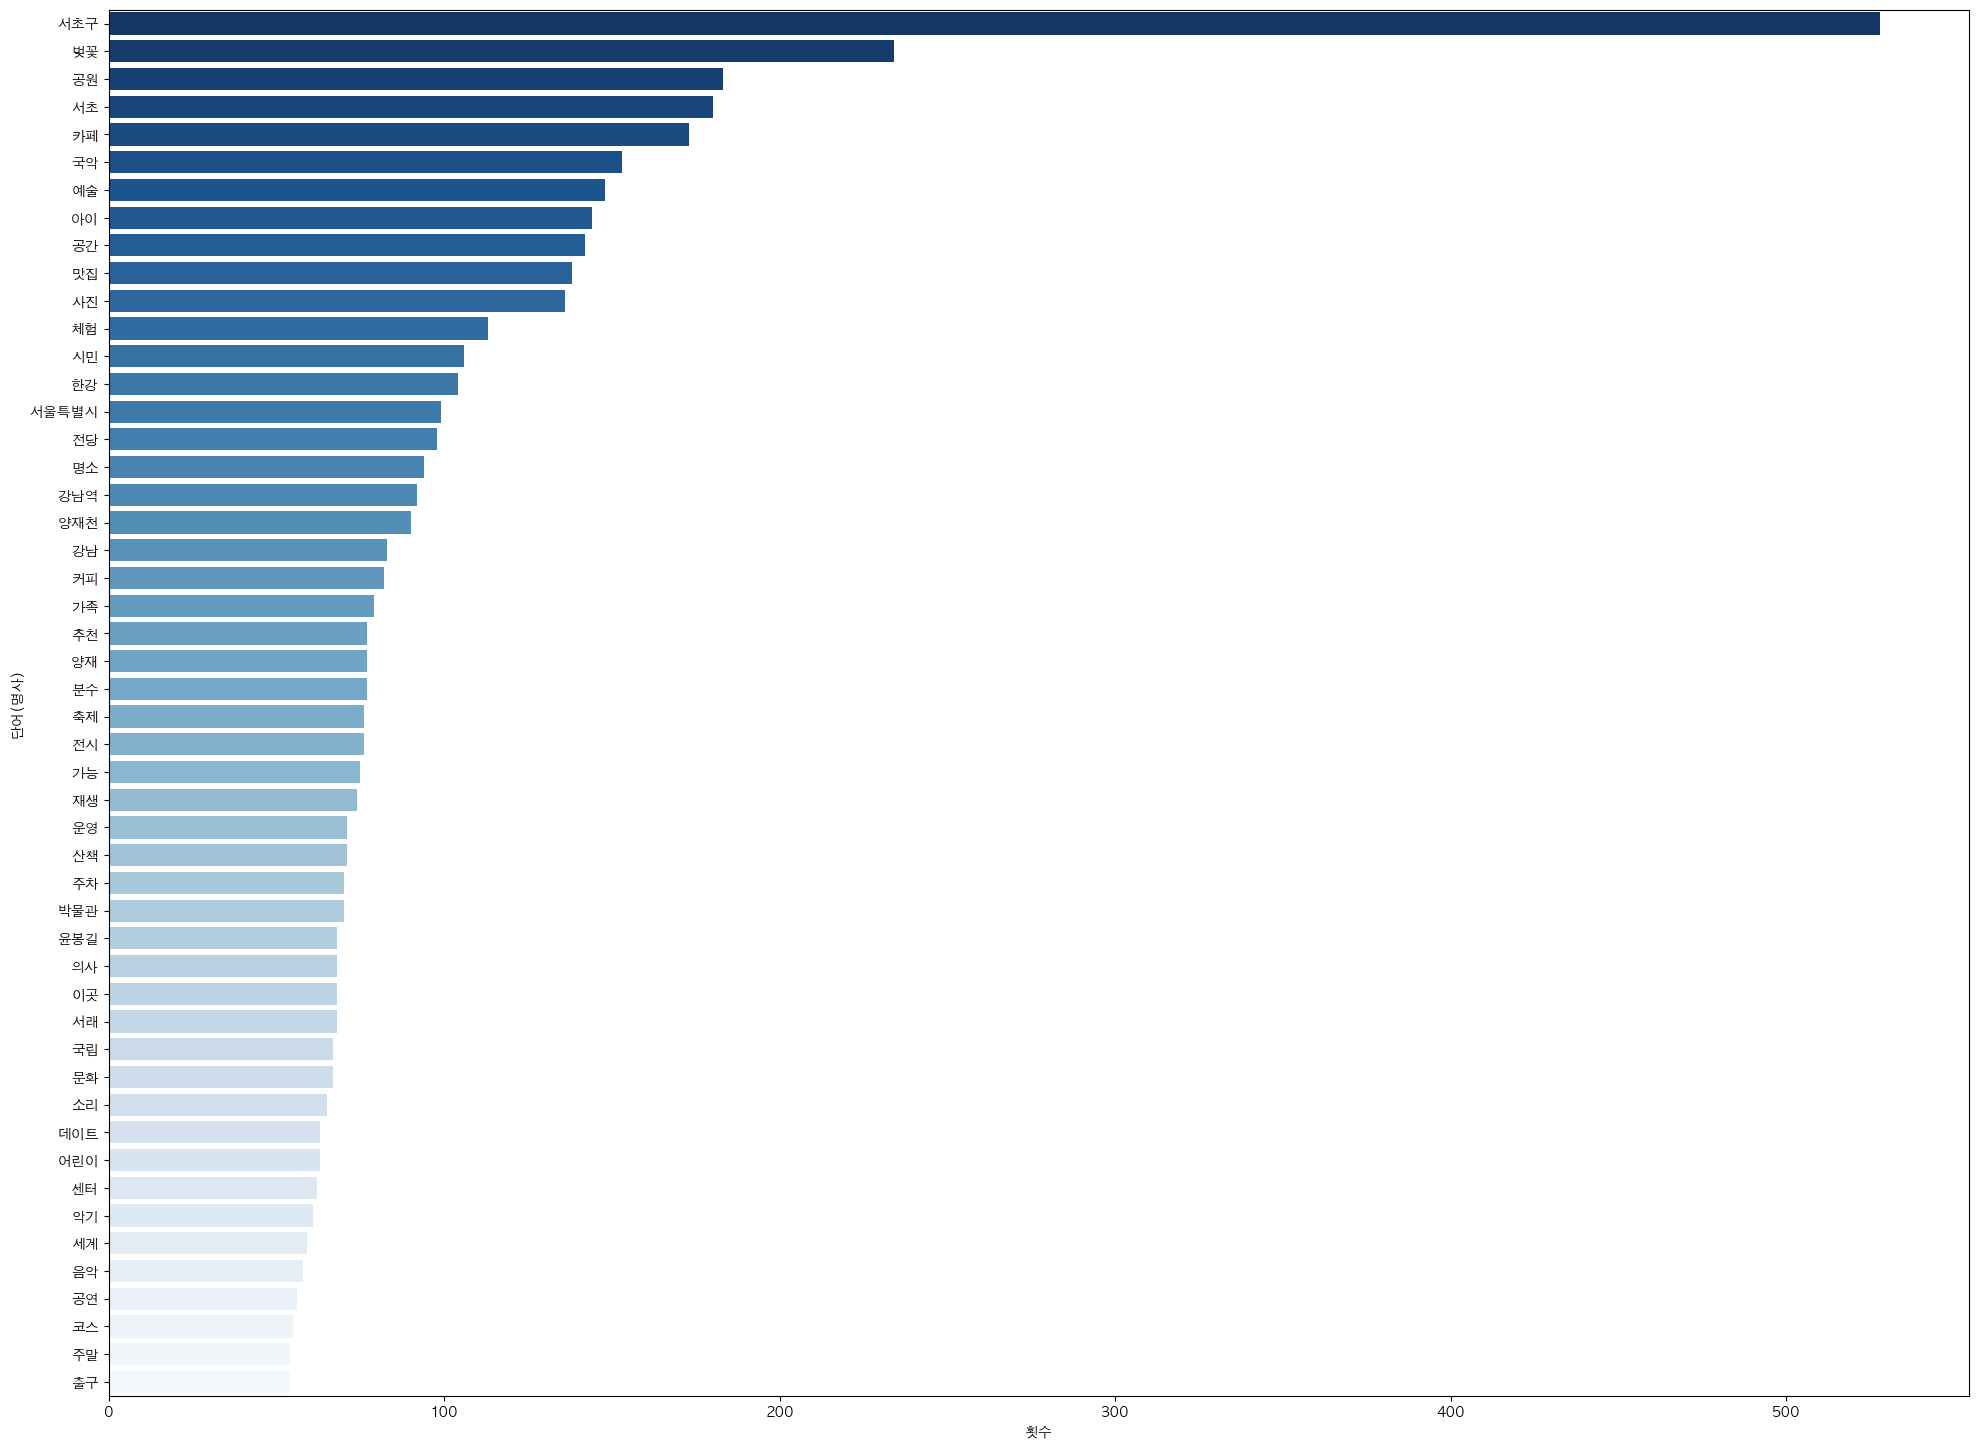

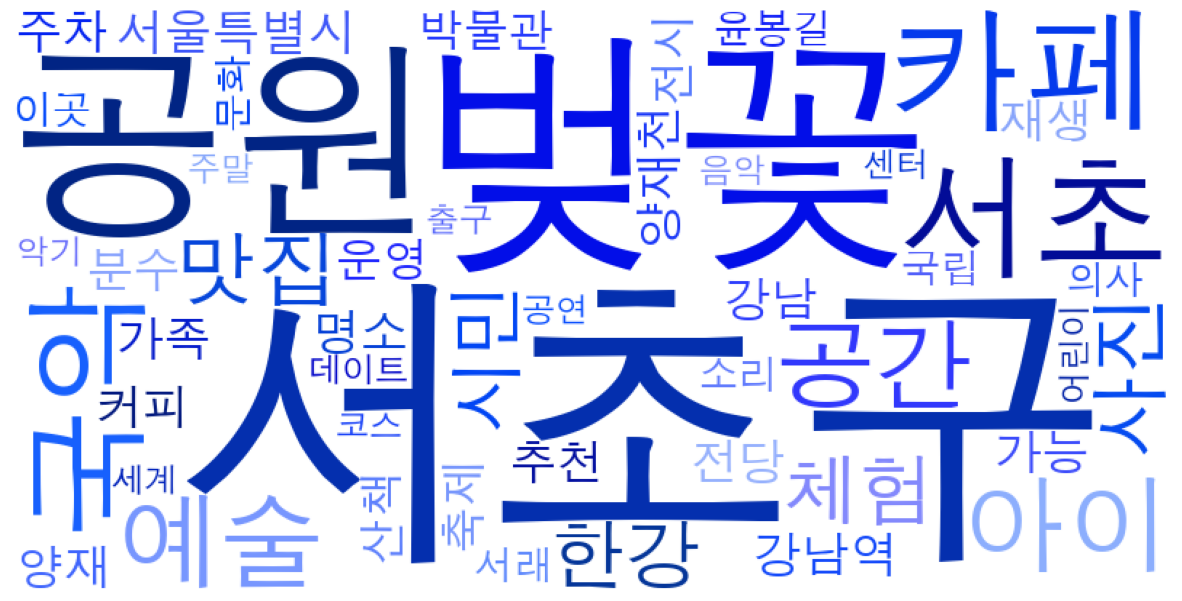

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import platform
import numpy as np

# 워드클라우드 글색
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(220,240),np.random.randint(94,100),np.random.randint(25,80)))

font_name = "AppleGothic"
rc('font', family=font_name)

# 그래프 출력 함수
def create_graph(counts):
    graph_df = pd.DataFrame(counts)
    graph_df.columns = ['단어(명사)', '횟수']
    
    plt.figure(figsize = (24, 18))
    sns.barplot(x = '횟수', y = '단어(명사)', data = graph_df, palette="Blues_r")
    
# 그래프 출력
create_graph(tokenscounted_blog)

# 워드클라우드 출력
font_path = "/Users/jeongwon/Library/Fonts/AppleGothic.ttf"

wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white', 
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400,
                      color_func = color_func
                     ).generate_from_frequencies(dict(tokenscounted_blog))
                                
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/Users/jeongwon/Documents/대학/2-1/웹파/STUDENT_LECTUREMATERIAL/5_PROJECT_RegularCourse_ONLY/token_wordcloud.png')

### b. 선정한 추천 관광지에 대한 리뷰 분석

스크랩한 리뷰에 대한 감정분석을 진행했다. 단순히 리뷰를 별점으로 분류하여 별점이 높은 리뷰는 긍정 리뷰, 별점이 낮은 리뷰는 부정 리뷰로 판단하는 방법도 있었으나, 감성분석을 하기로 한 이유는 다음과 같다.
1. 별점이 높은 리뷰에도 불만사항, 개선할만한 점 등의 내용이 있는 경우가 잦아 단순히 별점으로 분류하면 이를 간과할 수 있었다.
2. 부정리뷰의 수가 긍정리뷰에 비해 압도적으로 적어 표본이 부족했다.
3. 위의 단계에서 별점 정보를 스크래핑하는데에 실패했다.
 
다만 머신러닝에 대한 지식이 없어 Naver CLOVA 감정분석 API를 이용했다. 월 1000회의 호출까지 무료라는 정책상 많이 이용하기엔 제한이 있어 가장 빈도수가 높은 관광지인 반포한강공원의 상위 n개 리뷰에 대해서만 감정분석을 실시하였다.

리뷰별로 감정 분석하여 긍정인지, 중립인지, 부정인지 판별하여 결과에 따라 리턴하는 함수를 작성했다.

In [33]:
#!/usr/bin/env python3
#-*- codig: utf-8 -*-
import sys
import requests
import json

def sentiment_analysis(reviews):
    # reviews(list)
    # --> positive_reviews: 긍정 리뷰 리스트, negative_reviews: 부정, 중립 리뷰 리스트, analyses: 분석 결과 리스트
    
    analyses = []
    positive_reviews = []
    negative_reviews = []
    
    for review in reviews:
        client_id = "33t2zzzy8d"
        client_secret = "2RvFwXlPqiCBatX85Wf3br0WRRHrw9eF9GqqbxJI"
        url = "https://naveropenapi.apigw.ntruss.com/sentiment-analysis/v1/analyze"
        headers = {
            "X-NCP-APIGW-API-KEY-ID": client_id,
            "X-NCP-APIGW-API-KEY": client_secret,
            "Content-Type": "application/json"
        }

        # content = "싸늘하다. 가슴에 비수가 날아와 꽂힌다."
        data = {
            "content": review
        }

        # print(json.dumps(data, indent = 4, sort_keys = True))
        response = requests.post(url, data=json.dumps(data), headers=headers)
        rescode = response.status_code
        if(rescode == 200):
            # print (response.text)
            pass
        else:
            print("Error : " + response.text)

        text = response.json()
        raw = text["sentences"]
        
        #for i in range(len(raw)):
        # 긍정, 부정 리뷰 각각 추출
        if (text["document"]["sentiment"] == "positive"):
            positive_reviews.append(review)
        elif (text["document"]["sentiment"] == "negative" or text["document"]["sentiment"] == "neutral"):
            negative_reviews.append(review)
            
        analysis = (text["document"])["confidence"]
        analyses.append([review, analysis])
        
    return positive_reviews, negative_reviews, analyses

# 감정분석을 위한 문장 다듬기 함수
def clean_list(reviews):
    # reviews = reviews.split(".")
    
    final = []
    for review in reviews:
        if review:
            final.append(review.strip())
    
    return final

In [34]:
final = clean_list(reviews_list1)

In [35]:
positive_reviews1, negative_reviews1, analyses1 = sentiment_analysis(final)

In [36]:
print(f"부정, 중립 리뷰: \n{negative_reviews1}\n")
print(f"긍정 리뷰: \n{positive_reviews1}")

부정, 중립 리뷰: 
['연인과 좋은 시간 보내기 좋네요 하지만 ㅎ하장실이 멀고 사람이 많아요 분수쇼도 은근히 짧네요', '7m이상되는 대교옆단 음악분수의 현란함과 수상보트의 공연으로 볼만하고 공원이 깨끗한 편이었으나 한쪽으로만 분수가 설치되어 구경인파가 몰려있고 공원크기에 비해 외부에 화장실,쓰레기처리시설,편익시설 등이 부족한 듯 보였습니다.', '낮에도 밤에도 예쁜 반포한강공원. 잠수교에서 시내버스 이용도 가능. 아들을 잃은 아픈 사고가 있었던 장소.', '사람이 많고 편의점이나 화장실 이용할때마다 줄을 서야 할 정도로 몰리니 참고하시고 저녁에 주차된 차량들 빠지는데 한참 걸립니다... 그래도 시원하고 좋네요', '한밤에 시원한 산책길과 커피한잔이 생각난다면 ^^', '요즘 나들이 객이.무지많아서 주차도 난리고 사람도 엄청나게 많음 저녁은 아직까지 쌀쌀함', '아름다운 풍경 아름다운 일몰 참 멋지고 아름다운 곳이죠 다만 주차장이 부족하다는 게 흠입니다', '시민들의 휴식처 잔디공원이  좀더많았으면 좋겠어요', '마침 야시장을 하는 날이 였는데... 깔끔하고 좋았지만,화장실과 휴지통이 없어 아쉽', '사람들이 많다 커플죽어 그리고 세빛섬 앞에 있는 꼬치 개맛없음 걍 분위기 내려고 먹으셈', '세빛 일루미네이션 빛축제라 방문했는데 넘 평범한(?) 행사라 그런지 썰렁~', '맑은 초가을하늘과 한강,빌딩 자전거 타고 구경하셩!', '반포한강공원 마리나파크의 이국적인 풍경 통닭집, 편의점, 카페가 모여있는곳']

긍정 리뷰: 
['초중고등학교때 잠원동에 살면서 기분전환이 필요할때마다 방문했던 곳이여서 저한테 뜻깊은 장소입니다. 잠원역이나 고속터미널역에서 도보 20~30분정도 소요되는 좋은 위치에 자리잡고 있습니다. 여러 신나는 노래에 맞춰 춤추는 듯한 무지개분수, 저 멀리 보이는 남산타워, 광활한 한강을 가까이 즐길수 있는 뷰, 놀러온 듯한 느낌을 확실히 주는 분위기 등 매우매우 좋은 장소입니다. 돗자리를 사거나 대여해서 자리를 잡고 맛있는 음식을 먹으며 여유롭게 

<br>
이후 함수를 호출했다. 전체 리뷰 중 부정, 중립 리뷰는 수가 적어 읽으며 개선점을 파악하기 쉬웠으나, 긍정 리뷰를 단순히 읽고 활성화 방안을 제시하기엔 수가 많아 또 한번 빈출 단어를 그래프 및 워드클라우드로 시각화하는 과정을 거쳤다. 전처리 과정을 거친 후, konlpy pecab을 이용하여 명사, 형용사만 추출하고 관광지 정보와 관련없는 불용어를 삭제하는 함수를 작성했다.

In [28]:
# 전처리 함수(단어 토큰화)
def tokens_extract2(reviews):
    tokens = []
    
    # 명사, 형용사 추출
    for text in reviews:
        words_list = []
        # print(pecab.pos(text))
        for word, tag in pecab.pos(text):
            if (tag == 'VA'):
                words_list.append(word)
        tokens.extend(words_list)
        tokens.extend(pecab.nouns(text))
        
    """
    # 1글자 단어 삭제
    unique_list = []
    for word in tokens:
        if (len(word) > 1):
            unique_list.append(word)
            
    # 중복 단어와 1글자 단어 삭제
    unique_list = []
    for word in tokens:
        if (word not in unique_list and len(word) > 1):
            unique_list.append(word)
    """
    
    # 불용어 삭제
    selected_list = []
    
    stopwords = ['안녕','서울','서울시','소개','영상','사이','위치','길이','거리','여행','여기','저기','거기','마련','도시','이동',
                 '정말','다시','역시','사실','다음','보고','저희','너희','우리','지금','너무','그냥','때문', '하나','바로','조금',
                 '위해','정도','시간','생각','가장','가지','이번','경우','전부','아주', '이제','요즘','어제','오늘','가면','다른',
                 '먼저','계속','거의','가동','근처','의외','장소','모두','어디','기본','매일','완전','살짝','인분','참고','한번',
                 '타고','기전','포스팅','제일','왼쪽','오른쪽','고생','완쾌','원래','이름','자주','고민','마음','진짜','참고','하루',
                 '잠시','곳곳','처음','마지막','아래','이것','저것','가득','표정','미리','이상','기도','마치','시작','모습','생활',
                 '아침','점심','저녁','관심','비밀','기분','필수','블로그','출처','사업','최고','최근','방문','개인',
                '기준','후기','예약','관란','개월','인기','회원','어린이집','이것','이거','저것','저거','규모','무료','비용'
                 ,'기대','지도','이전','건물','정문','좌측','우측','이용','자리','인사','시설','발생','수','많','곳','때','있','것'
                '같','좋','것','같','시','중','편']

    for word in tokens:
            if word not in stopwords:
                selected_list.append(word)
    
    return selected_list

In [37]:
# 함수 호출
extracted_tokens_2 = tokens_extract2(positive_reviews1)

tokenscounted_review = count_tokens(extracted_tokens_2, 20)

# print(tokenscounted_review)

In [38]:
print(tokenscounted_review)

[('한강', 24), ('분수', 19), ('사람', 17), ('공원', 16), ('섬', 16), ('빛', 14), ('반포', 12), ('바람', 12), ('자전거', 11), ('산책', 11), ('밤', 10), ('야경', 9), ('날씨', 8), ('날', 8), ('무지개', 7), ('분위기', 7), ('반포대교', 7), ('주차', 7), ('맛있', 6), ('분', 6)]


리턴받은 최빈값 50개를 그래프와 워드클라우드로 시각화했다.

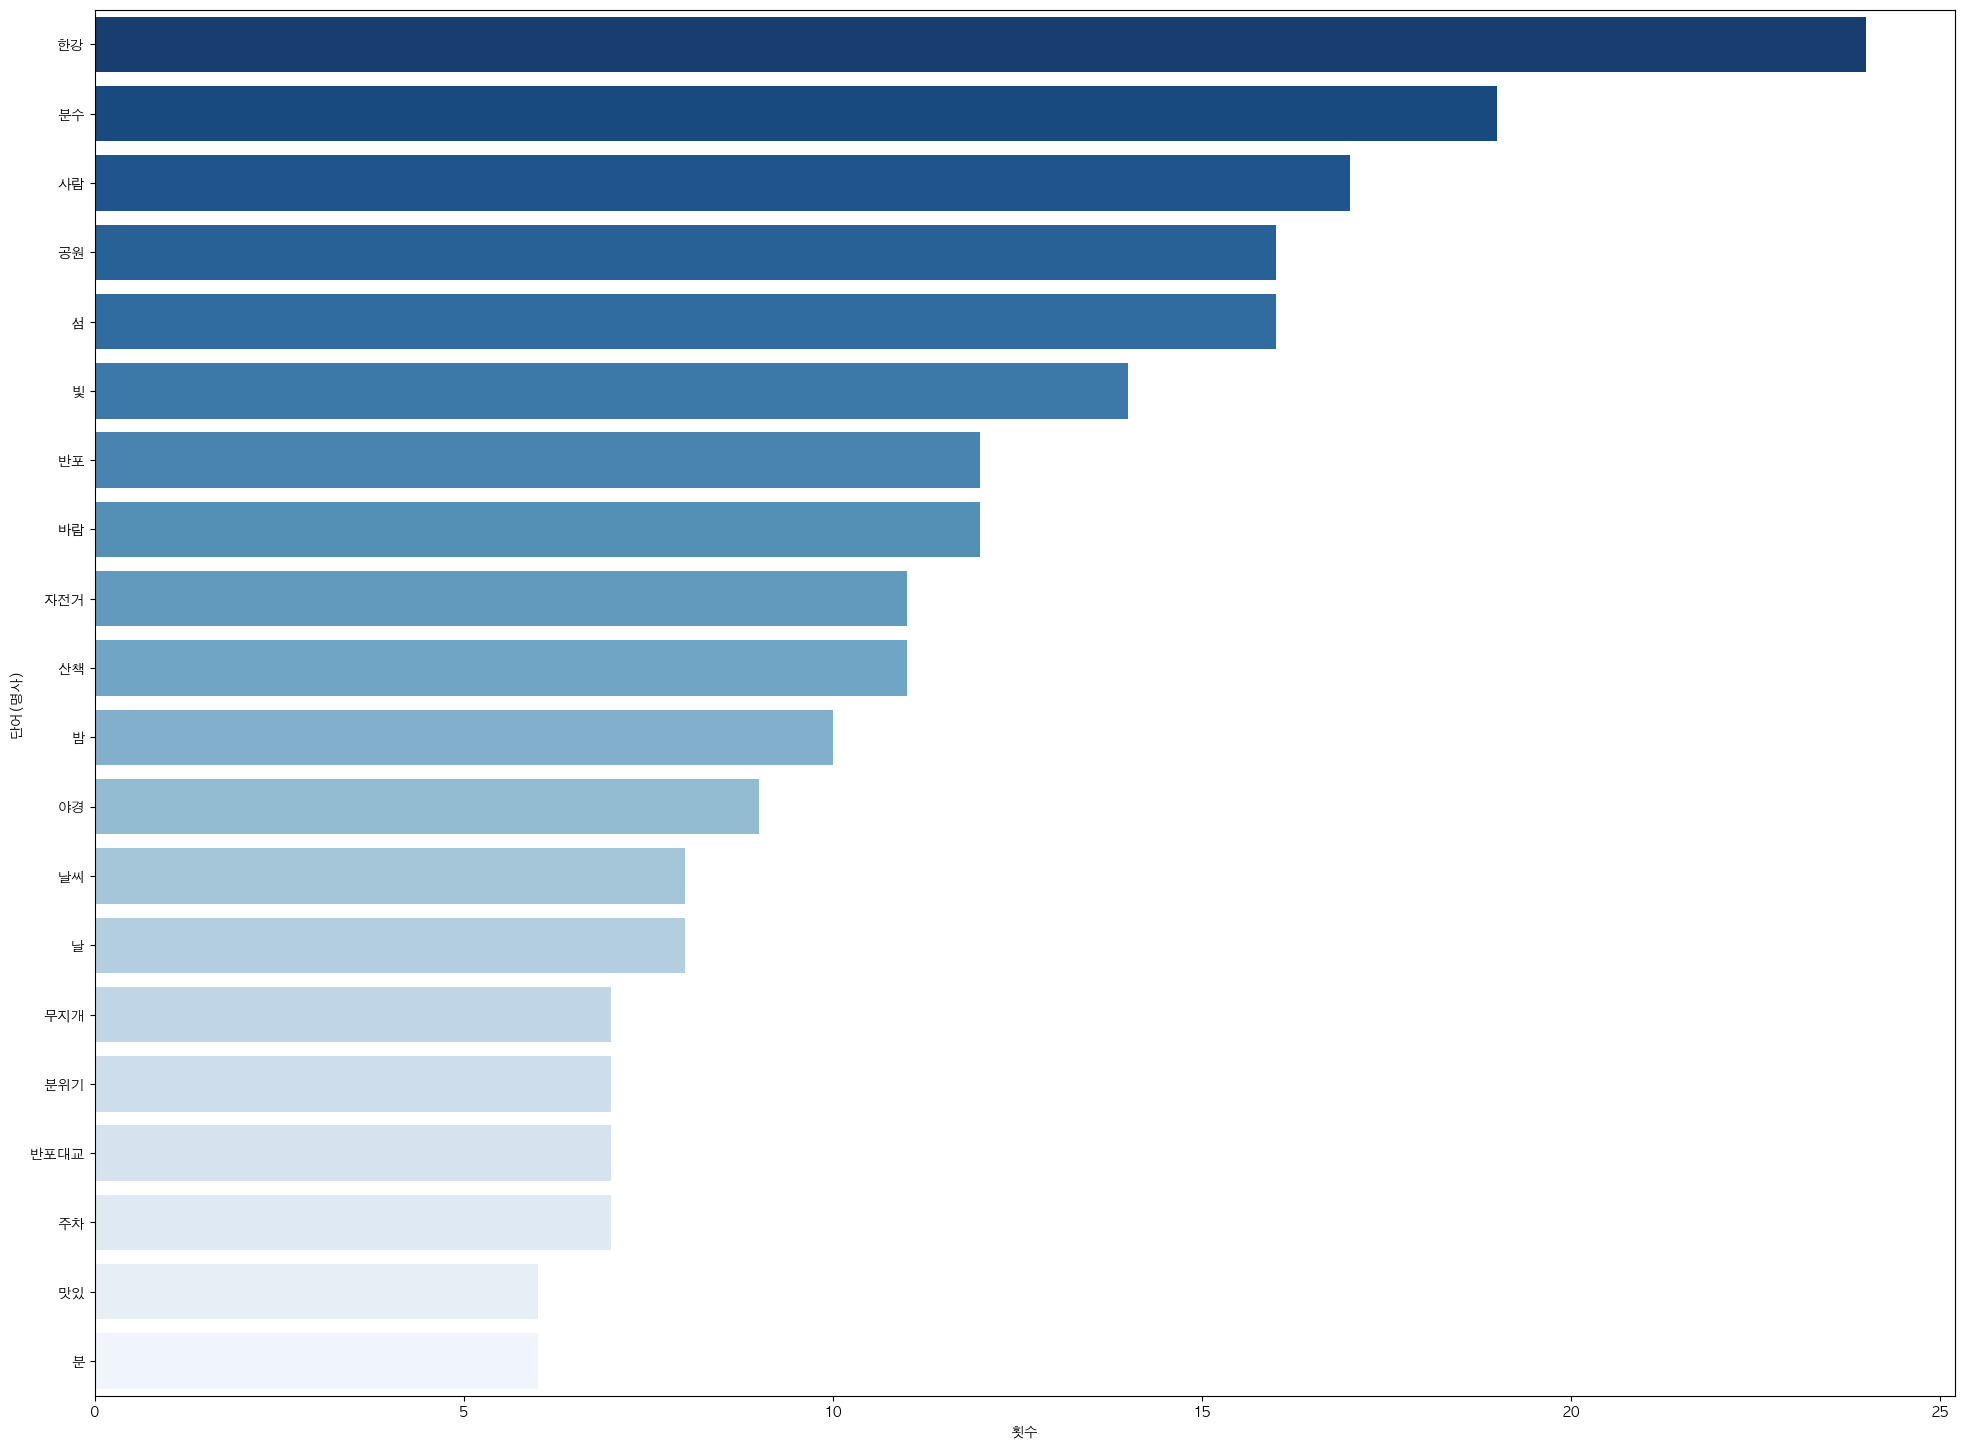

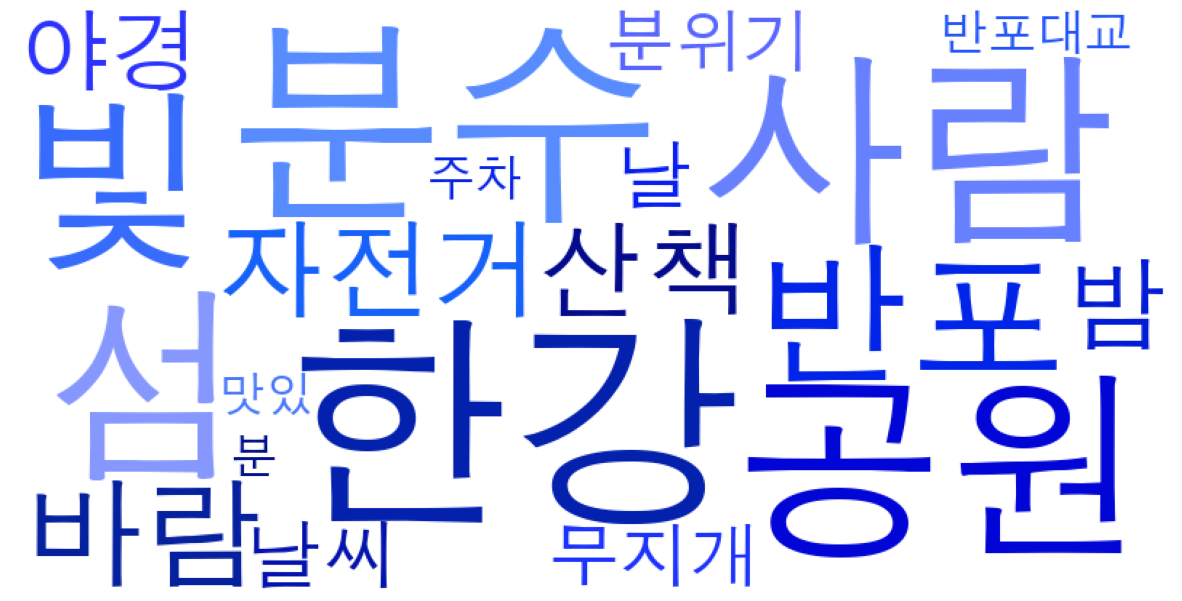

In [39]:
# 그래프 출력 함수
def create_graph(counts):
    graph_df = pd.DataFrame(counts)
    graph_df.columns = ['단어(명사)', '횟수']
    
    plt.figure(figsize = (24, 18))
    sns.barplot(x = '횟수', y = '단어(명사)', data = graph_df, palette="Blues_r")
    
# 그래프 출력
create_graph(tokenscounted_review)

# 워드클라우드 출력
font_path = "/Users/jeongwon/Library/Fonts/AppleGothic.ttf"

wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white', 
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400,
                      color_func = color_func
                     ).generate_from_frequencies(dict(tokenscounted_review))
                                
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/Users/jeongwon/Documents/대학/2-1/웹파/STUDENT_LECTUREMATERIAL/5_PROJECT_RegularCourse_ONLY/review_wordcloud.png')

## (5) 분석 결과 도출

우선 네이버 블로그 분석 결과, 의미있는 단어 중 빈도수가 높은 단어로는 '벚꽃', '공원', '국악', '예술', '한강', '전당', '강남역', '양재천', '윤봉길', '서래'가 있었다. 이를 통해 추론한 결과, 추천할 만한 서초구의 관광지를 빈도순으로 나열해보면 반포/잠원한강공원, 국립국악원, 예술의전당, 강남역, 양재천, 윤봉길의사기념관, 서래마을이 있었다.<br>
또한 '벚꽃' 키워드의 빈도수가 매우 높은 것을 보아, '매헌시민의숲', '양재천' 등 벚꽃으로 유명한 명소에서의 벚꽃 구경이 서초구 관광의 중요한 요소임을 알 수 있었다.<br><br>
이후 가장 빈도수가 높고 대중적인 관광지 반포한강공원에 대한 분석을 진행하였다.<br>
부정 리뷰에서 제시한 문제점으로는 주차장 부족으로 인한 주차 문제, 화장실 부족, 쓰레기통 부족, 안전 문제가 있었으며 진행하는 행사의 특색이 부족하다는 지적 또한 있어 이에 대한 개선이 이루어진다면 좋을 것이다.<br>
긍정 리뷰 분석 결과 빈도수가 높은 단어 중 활성화 방향을 제시할 수 있는 요소로는 '분수', '빛', '자전거', '맛있'이 있었다. 이를 통해 추론한 결과, 많은 이들이 분수쇼, 빛축제 등의 행사를 보기 위해 반포한강공원을 방문한다는 것을 알 수 있어 관련 행사가 많이 기획된다면 관광지 활성화에 더욱 기여할 것이다. 또한, 많은 이들이 자전거를 타기 위해 반포한강공원을 방문한다는 것, 야시장/공원 내부 음식점의 퀄리티가 방문자의 경험에 큰 영향을 끼친다는 것을 알 수 있었다.

## (6) 결론

블로그 크롤링 과정을 거친 결과 예상보다 적은 관광지가 나왔으며, API, 시간 및 실력의 한계로 빈약한 과정이 많았다. 결론적으로, 애초에 서초구에 관광지라고 할만한 곳이 많지 않다는 것이 문제임을 실감하였고 따라서 새로운 관광지의 개발이 기존 관광지의 개선, 활성화보다 우선이 되어야 한다고 생각하였다.<br><br>
본 프로젝트는 관광지 발견 및 활성화를 주제로, 서초구만을 중점으로 진행했으나, 본 프로젝트의 소스코드를 활용하면 서초구 뿐만 아닌 다른 어떠한 장소의 빈출 관심 키워드를 찾고, 해당 장소의 특징에 대한 분석을 통해 개선방안, 활성화 방안을 구상해 낼 수 있다는 점에서 의의를 가진다고 생각한다.

## (7) 참고 문헌

* 이형석 외. 데이터분석 실무 with 파이썬
* 한국관광 데이터랩, https://datalab.visitkorea.or.kr
* 검색 API 블로그 검색 구현 예제, https://developers.naver.com/docs/serviceapi/search/blog/blog.md#python
* Pecab, https://github.com/hyunwoongko/pecab
* Webscrape Google Map Reviews Using Selenium Python, https://www.linkedin.com/pulse/webscrape-google-map-reviews-using-selenium-python-choy-siew-wearn?trk=pulse-article_more-articles_related-content-card
* 감정 분석 예시, https://api.ncloud-docs.com/docs/ai-naver-clovasentiment-api
* 네이버 클로바 Sentiment 문장 텍스트 감정 분석, https://dataanalytics.tistory.com/entry/파이썬-네이버-클로바-Sentiment-문장-텍스트-감정-분석

## (8) 별첨

(3)의 획득한 데이터 원본, (4)의 가공된 데이터 원본, (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본은 본문에 전부 첨부했습니다.